# 02. Fundamentos de Python (continuación)
### Mini-curso de Introducción a la programación científica
#### Oceanografía Física, CICESE
22 de septiembre de 2025

> El material de este "notebook" está basado en la lección [Programming with Python](https://swcarpentry.github.io/python-novice-inflammation/) de los [Software Carpentry Workshops](https://software-carpentry.org/), publicada bajo la licencia [Creative Commons - Attribution License](https://software-carpentry.org/license/). Traducción y modificaciones por Karina Ramos Musalem. 

## Antes de empezar

Al terminar este notebook:

* Reforzarán los conocimientos adquiridos en el notebook pasado. 
* Aprenderán los conceptos de programación de ciclos, condicionales y funciones.
* Aprenderán algunas funciones de matplotlib para visualización de datos 2D.

## 4. Repetir acciones con ciclos o *loops*

#### Preguntas a responder
1. ¿Cómo repetir la misma operación en muchos valores distintos?

#### Objetivos
* Explicar qué es un ciclo `for` (*for loop*).
* Escribir correctamente un ciclo `for` para repetir cálculos simples.
* Monitorear cambios en la variable del ciclo conforme corre el ciclo.
* Monitorear cambios en las otras variables conforme se actualizan durante el ciclo `for`.

En la clase pasada escribimos código de Python que grafica valores de interés de nuestro archivo de datos (`precip_mensual_estacion01.csv`). Tenemos otros 6 archivos de datos de otras variables meteorológicas y podríamos tener muchos más. Queremos crear gráficas para todos nuestros archivos y para eso tenemos que enseñarle a la computadora a repetir acciones.

Por ejemplo, podemos repetir la impresión de cada caracter en un palabra:

In [1]:
palabra = 'plomo'

En Python, un *string* o cadena es básicamente una colección ordenada de caracteres y cada caracter tiene un número asociado - su **índice** (similar al índice que estudiamos en el notebook 1 para arreglos). Así que podemos acceder a los caracteres de una cadena usando sus índices. Por ejemplo, podemos obtener el primer caracter de la palabra `'plomo'`usando `palabra[0]`. Una forma de imprimir cada caracter es usando 5 comandos `print`:

In [2]:
print(palabra[0])
print(palabra[1])
print(palabra[2])
print(palabra[3])
print(palabra[4])

p
l
o
m
o


¡Guácala! Esta forma de hacerlo no es buena por tres razones:
1. **No es escalable**. Imagínate que tienes que imprimir algo con cientos de caracteres. Es fácil hacerlo con cinco, pero hacelo con cien es muy impráctico.
2. **Es dificil de mantener y modificar**. Si queremos decorar cada caracter con un asterisco o algún otro caracter, tendríamos que cambiar línea por línea del código. De nuevo, parece fácil cuado hay 5 líneas pero no lo es tanto para cientos de líneas.
3. **Es frágil**. Si usamos este código con otra palabra que tenga un número distinto de caracteres, el código no va a servir. Si la palabra es más larga, solo aparecerán parte de las letras, y si es más corta se producirá un error porque no habrá nada que imprimir.

Por ejemplo:

In [3]:
palabra = 'uno'
print(palabra[0])
print(palabra[1])
print(palabra[2])
print(palabra[3])
print(palabra[4])

u
n
o


IndexError: string index out of range

Pero hay una mejor solución:

In [4]:
palabra = 'plomo'

for char in palabra:
    print(char)

p
l
o
m
o


Esto es más corto - al menos más corto que 100 `print`s  - y es más robusto (podemos usar el mismo código con cualquier palabra): 

In [5]:
palabra = 'oxygen'

for char in palabra:
    print(char)

o
x
y
g
e
n


Esta versión usa un *loop* o ciclo **for** para repetir una operación - en este caso imprimir un caracter - una vez por cada 'elemento' en una secuencia. La forma general de un ciclo **for** es:

**for** variable **in** coleccion:
    
    # haz algo usando variable, por ejemplo imprimir
    
Usando el ejemplo anterior (solo cambia *word* por *palabra*):

<img src='imagenes/loops_image.png'>

En donde cada caracter (`char`) en la variable `word` o en nuestro caso `palabra` es pasada por el ciclo e impresa, un caracter tras otro. Los números en el diagrama denotan en qué ciclo se imprimió el caracter (1 es el primer ciclo y 6 es es último).

Podemos llamar a la variable del ciclo como queramos, pero debe haber un símbolo `:`al final de la línea inicial de ciclo y siempre **debemos respetar la alineación**: Lo que queremos correr dentro del loop debe estar "indentado" hacia la derecha. En Python no hay un símbolo para indicar el final del ciclo; en cambio, lo que está indentado despues del `for` será parte del ciclo.

Aquí hay otro ciclo que actualiza el valor de una variable cada vuelta:


In [6]:
largo = 0
for vocal in 'aeiou':
    largo = largo + 1
print('Hay', largo, 'vocales')

Hay 5 vocales


Vale la pena desmenuzar la ejecución de este programa paso por paso. Como hay cinco caracteres en `'aeiou'`, el código en la tercera línea se ejecutará cinco veces. La primera vez, `largo`es cero (el valor que le asignamos en la primera línea del código) y `vocal` es `'a'`. La línea 3 agrega 1 al valor de `largo`, produciendo 1, y actualiza `largo`para referir al nuevo valor. En la segunda vuelta, `vocal` es `'e'` y `largo`es 1, así que `largo` se actualiza al valor 2. Después de las tres vueltas siguentes, `largo`es 5; como no hay nungún otro elemento en `'aeiou'`para que Python procese, el ciclo se termina y el comando `print` de la cuarta línea se ejecuta y nos dice la respuesta final.

Nota que la variable del ciclo se está usando para llevar un registro del progreso del ciclo. Sigue existiendo cuando termina el ciclo y también podemos reutilizar varables que se usaron como variables de ciclo anterirormente:

In [7]:
letra = 'z'
for letra in 'abc':
    print(letra)
print('Después del ciclo, letra es', letra)

a
b
c
Después del ciclo, letra es c


Nota también que encontrar la longitud de un cadena de caracteres es una operación tan común que Python tiene una función integrada llamada `len`para hacerlo:

In [8]:
print(len('aeiou'))

5


> `len` es mucho más rápida que cualquier función que podríamos escribir y mucho más fácil de leer que el ciclo que escribimos; nos puede dar la longitud de muchas otras cosas además de cadenas, así que la seguiremos usando cuando podamos.

#### Pon en práctica lo que aprendiste

1. Python tiene una función llamada `range`que genera una secuencia de números. `range` acepta 1, 2, o 3 parámetros.
    * Si le damos un parámetro, `range` genera una secuencia de esa longitud que comienza en 0 e incrementa en 1. Por ejemplo `range(3)` produce números `0,1,2`.
    * Si le damos 2 parámetros, `range`comienza en el primero y va hasta el segundo en incrementos de 1. Por ejemplo `range(2,5)` produce `2, 3, 4`.
    * Si le damos 3 parámetros, empieza en el primero, va hasta el segundo e incrementa en pasos dados por el tercero. Por ejemplo `range(3, 10, 2)` produce `3, 5, 7, 9`.
   
   Usando `range`, escribe un ciclo que imprima los primeros 10 números naturles (1,2,3,...,10) 

In [9]:
# Respuesta

for ii in range(1,11):
    print(ii)

1
2
3
4
5
6
7
8
9
10


2. Podemos exponenciar algo usando la notación `**`. Por ejemplo $2^3$ es `2**3`. Escribe un ciclo que calcule el mismo resultado que `2 ** 3` utilizando únicamente la multiplicación  `*` (sin usar exponenciación).

In [10]:
# Respuesta
a = 1
for ii in range(3):
    a = a*2

print(a)

#Comprobación
#print(2**3)

8
8


### 4.1 En resumen

* Usa `for variable in secuencia:` para procesar uno por uno los elementos de una secuencia.
* El cuerpo de un ciclo `for` debe estar indentado.
* Usa `len(cosa)`para determinar la longitud de alguna cosa que contiene valores.

## 5. Listas
#### Preguntas a responder
* ¿Cómo puedo guardar muchos valores juntos?

### Objetivos
* Explicar qué es una lista.
* Crear e indizar listas de valores simples.
* Cambiar el valor de elementos individuales.
* Reordenar y rebanar elementos de una lista.

De manera similar a un cadena que contiene muchos caracteres, una **lista** en un contenedor que puede guardar muchos valores. A diferencia de los arreglos de NumPy, las listas son intrínsecas de Python, por lo cual no necesitamos importar ninguna bibliotca para usarlas. Podemos crear listas poniendo valores entre `[]` y separandolos con `,`: 

In [12]:
impares = [1, 3, 5, 7]
print('los impares son:', impares)

los impares son: [1, 3, 5, 7]


Podemos acceder a los elementos de una lista usando índices:

In [13]:
print('El primer elemento es ', impares[0])
print('El último elemento es ', impares[3])
print('El elemento -1 es ', impares[-1])

El primer elemento es  1
El último elemento es  7
El elemento -1 es  7


Sí, podemos usar índices negativos en Pyhton. El elemento `-1` nos da el último de la lista, el `-2`el penúltimo, etc.

Si hacemos un ciclo sobre un a lista, la variable del ciclo se asigna los elementos de la lista uno por uno:

In [14]:
for numero in impares:
    print(numero)

1
3
5
7


Hay una diferencia importante entre las cadenas de caracteres y las listas: podemos cambiar los valores de una lista, pero no podemos cambiar caracteres individuales en una cadena. Por ejemplo:

In [20]:
nombres = ['Candela', 'Ochoa', 'Ripo'] # Ripa mal escrito
print('nombres era originalmente:', nombres)
nombres[2] = 'Ripa' # Nombre correcto
print('nombres es ahora:', nombres)

nombres era originalmente: ['Curie', 'Franklyn', 'Turing']
nombres es ahora: ['Curie', 'Franklin', 'Turing']


pero

In [15]:
nombre = 'Candela'
nombre[0] = 'c'

TypeError: 'str' object does not support item assignment

no funciona.

Los números y las cadenas son *inmutables*, es decir, no pueden modificarse. Las listas y los arreglos son *mutables* y pueden modificarse después de ser creadas.

Las listas en Python pueden contener distintos tipos de elementos. Por ejemplo:

In [16]:
edades = [10, 20.4, 'desconocido'] # enteros, decimales y cadenas

Hay otras maneras de cambiar el contenido de una lista además de reasignando valores. Podemos agregar (*append*):

In [17]:
impares.append(11)
print('impares después de agregar un valor:', impares)

impares después de agregar un valor: [1, 3, 5, 7, 11]


In [18]:
elemento_eliminado = impares.pop(0)
print('impares después de quitar el primer elemento:', impares)
print('elemento eliminado:', elemento_eliminado)

impares después de quitar el primer elemento: [3, 5, 7, 11]
elemento eliminado: 1


In [19]:
impares.reverse()
print('impares al revés:', impares)

impares al revés: [11, 7, 5, 3]


Hay que tener cuidado cuando modificamos una lista. Si queremos hacer una copia de la lista y modificar la copia, es posible que queramos hacer lo siguiente:

In [20]:
impares = [1, 3, 5, 7]
primos = impares # Este es el paso mortal
primos.append(2)
print('lista primos', primos)
print('lista impares', impares)

lista primos [1, 3, 5, 7, 2]
lista impares [1, 3, 5, 7, 2]


¿Qué paso aquí? Solo queríamos modificar la lista `primos` pero también cambió la lista `impares`. Esto es porque Python guarda una lista en memoria y luego puede usar distintos nombres para referirse a la misma lista. Si solo queremos copiar una lista simple, podemos usar la función `list` de manera que no modifiquemos una lista que no queríamos modificar:

In [21]:
impares = [1, 3, 5, 7]
primos = list(impares) # Este es el paso mortal
primos.append(2)
print('lista primos', primos)
print('lista impares', impares)

lista primos [1, 3, 5, 7, 2]
lista impares [1, 3, 5, 7]


Se puede acceder a rebanadas o subconjuntos de listas y cadenas si especificamos los intervalos de valores entre `[]` como hicimos con los arreglos:

In [22]:
binomial_nombre = 'Drosophila melanogaster'
grupo = binomial_nombre[0:10]
print('grupo:', grupo)

especie = binomial_nombre[11:23]
print('especie:', especie)

chromosomas = ['X', 'Y', '2', '3', '4']
autosomas = chromosomas[2:5]
print('autosoma:', autosomas)

ultimo = chromosomas[-1]
print('último:', ultimo)


grupo: Drosophila
especie: melanogaster
autosoma: ['2', '3', '4']
último: 4


#### Pon en práctica lo que aprendiste

1. Usa las rebanadas para seleccionar solo los últimos 4 caracteres de una cadena y de una lista:

In [25]:
cadena_para_rebanar = 'Observaciones del 27-abr-2019'
lista_para_rebanar = ['fluor', 'cloro', 'bromo', 
                      'neodimio', 'disprosio', 'einstenio']

¿Tu solución funciona sin importar si conoces de antemano o no la longitud de la cadena y la lista? Si la respuesta es no, intenta cambiar tu estrategia para que sea más robusta.

PISTA: Recuerda que los índices pueden ser negativos también.

In [26]:
# Respuesta

print(cadena_para_rebanar[-4:])
print(lista_para_rebanar[-4:])

2019
['bromo', 'neodimio', 'disprosio', 'einstenio']


### 5.1 En Resumen

* `[valor1, valor2, valor3, ...]` crea una lista.
* Las listas pueden contener cualquier objeto de Python, incluyendo otras listas.
* Las listas están indizadas y se rebanan con `[]` como los arreglos y las cadenas.
* Las listas son mutables (los valores de sus elementos puede cambiarse en el mismo lugar).
* Las cadenas son inmutables (no les puedes cambiar un caracter).

## 6. Analizar datos de muchos archivos

#### Preguntas a responder
* ¿Cómo puedo hacer las mismas operaciones en varios archivos distintos?

### Objetivos
* Usar una función de una biblioteca para obtener una lista de nombres de archivos que concuerdan con un patrón.
* Escribir un ciclo `for` para procesar múltiples archivos.

Ya tenemos casi todo para procesar todos los archivos de datos que tenemos. Solo falta importar una biblioteca especial:

In [27]:
import glob

La biblioteca `glob` contiene una función, también llamada `glob`, que encuentra archivos y directorios (carpetas) cuyos nombres concuerdan con un patrón dado. Le proporcionamos esos partrones como cadenas: el caracter `*` representa cero o más caracteres, mientras que `?`representa solo un caracter. Podemos usarlos para obtener los nombres de todos los archivos CSV en la carpeta, o directorio, en la que se encuentra este notebook:

In [28]:
print(glob.glob('datos/*_mensual_estacion01.csv'))

['datos/temp_mensual_estacion01.csv', 'datos/indiceUV_mensual_estacion01.csv', 'datos/humedad_mensual_estacion01.csv', 'datos/presion_mensual_estacion01.csv', 'datos/viento_mensual_estacion01.csv', 'datos/radiacion_mensual_estacion01.csv', 'datos/precip_mensual_estacion01.csv']


Como muestran estos ejemplos, el resultado de `glob.glob` es una lista de archivos y directorios en orden arbitrario. Así que podemos hacer un ciclo sobre esta lista para hacer algo con cada nombre de archivo. En este caso, ese algo es generar gráficas para todos los datos. Si queremos empezar por analizar los primeros cinco archivos por orden alfabético, podemos usar la función `sorted`(ordenado) para generar una lista ordenada alfabéticamente del output de `glob.glob`:

datos/humedad_mensual_estacion01.csv


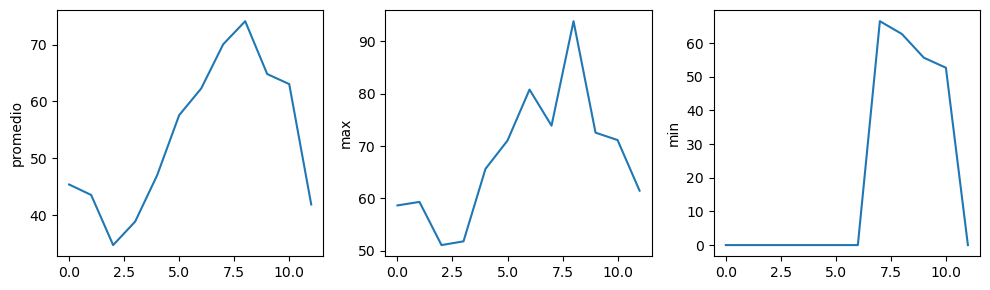

datos/indiceUV_mensual_estacion01.csv


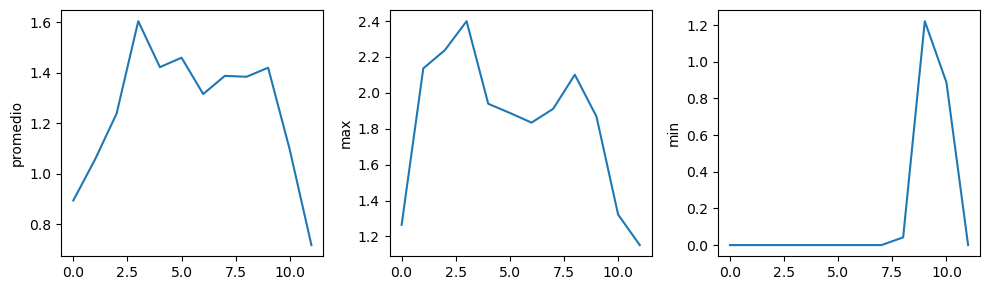

datos/precip_mensual_estacion01.csv


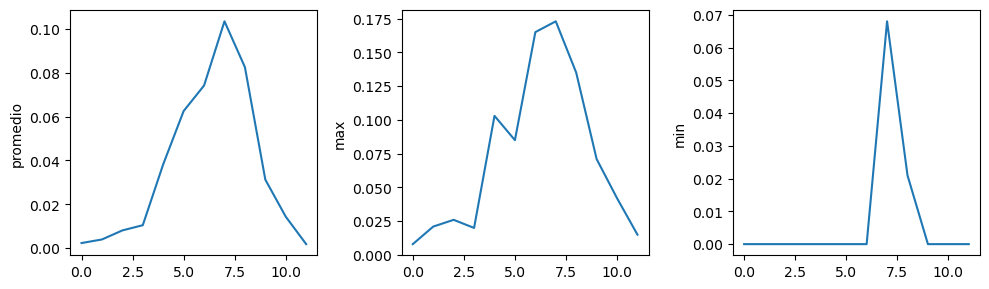

datos/presion_mensual_estacion01.csv


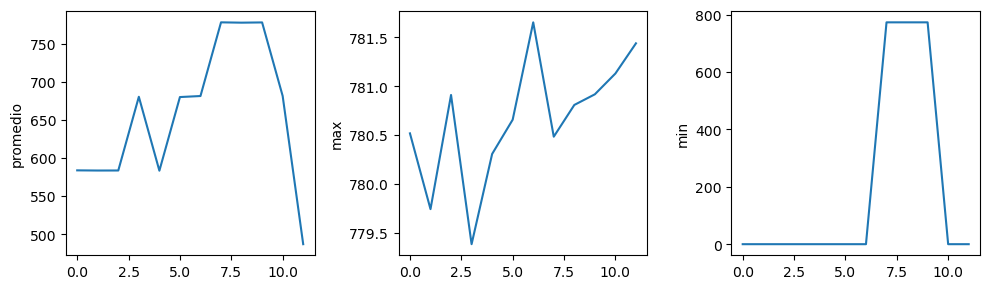

datos/radiacion_mensual_estacion01.csv


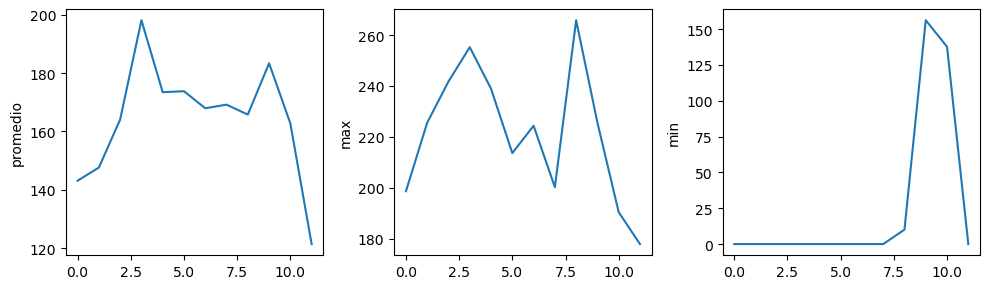

In [29]:
import glob
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('datos/*_mensual_estacion01.csv'))
filenames = filenames[0:5]
for filename in filenames:
    print(filename)

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('promedio')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()


Si nos fjamos en los mínimos, vemos que hay muchos ceros en todas las variables. Es un poco sospechoso que la radiación solar mínima en el promedio mensual sea cero, o peor aún, ¡que la humedad mínima sea cero! Hay algo raro con estos datos que debemos averiguar...

### 6.1 En resumen

* Usa `glob.glob(patrón)` para crear una lista de nombres de archivos cuyos nombres concuerdan con el patrón.
* Usa `*` en un patrón como comodín para representar cero o más caracteres, y `?` como comodín para representar un solo caracter.

## 7. Condicionales

#### Preguntas a responder:
* ¿Cómo puedo hacer que mis programas hagan distintas cosas con base en los valores de datos?

#### Objetivos:

* Utilizar los condicionales `if`, `elif` y `else`.
* Evaluar correctamente expresiones que contienen `and` y `or`.

Anteriormente descubrimos que había algo raro con los datos. ¿Cómo podemos usar Python para descubrir automáticamente los datos sospechosos y operar de distinta manera con ellos? En esta parte aprenderemos cómo escribir código que corra sólo cuando ciertas condiciones son ciertas.

Podemos pedirle a Python que ejecute ciertas acciones, dependiendo de alguna condición, utilizando el comando `if` (si). *Si (if) se cumple la condición, entonces haz ...* :

In [30]:
num = 37
if num > 100:
    print('mayor que')
else:
    print('menor que')
print('fin')

menor que
fin


La segunda línea usa la palabra `if` para decirle a Python que vamos a hacer una elección. Si la condición que sigue despuésd de `if` es verdadera, los comandos después del `if` (indentados dentro del `if`) se ejecutan y se imprime "mayor que". Si la prueba es falsa, se ejeculan los comandos después de `else`y entonces se imprime "menor que". Sólo se ejecuta una u otra opción antes de continuar con el programa y que se imprima "fin":

<img src="imagenes/diagrama_flujo_if.png">

No es absolutamente necesario tener un `else`. Si no hay `else`, Python simplemente no hace nada si la prueba es falsa:

In [31]:
num = 53
print('Antes del condicional...')
if num > 100:
    print(num, ' es más grande que 100')
print('... después del condicional')

Antes del condicional...
... después del condicional


También podemos encadenar varias pruebas usando `elif`, que es una abreviación de *else if* (si no). El siguiente programa usa `elif` para imprimir el signo de un número:

In [32]:
num = -3

if num >0:
    print(num, 'es positivo')
elif num == 0:
    print(num, 'es cero')
else:
    print(num, 'es negativo')

-3 es negativo


Nota que para probar igualdad usamos `==` porque `=`es solamente para asignar valores.

  También podemos combinar pruebas usando `and` (y) y `or` (o). La prueba `and` es verdadera solo si ambas partes son verdaderas:

In [33]:
if (1 > 0) and (-1 > 0):
    print('ambas partes son verdaderas')
else:
    print('al menos una parte es falsa')

al menos una parte es falsa


Mientras que `or` es verdadero si al menos una parte es verdadera:

In [34]:
if (1 < 0) or (-1 < 0):
    print('al menos una parte es verdadera')


al menos una parte es verdadera


#### Verdadero y Falso
Las palabras `True` (verdadero) y `False` (falso) son especiales en Python. Se llaman `booleanos` y representan la "verdad" en los valores. Una expresión como `1<0` regresa el valor `False`, mientras que `-1<0`regresa el valor `True`.

### Revisemos nuestros datos

Anteriormente vimos que el mínimo mensual de los datos para todos los años era cero. Esto es sospechoso porque ninguna variable de las que estamos analizando debería ser cero, salvo la precipitación (temperatura, presión, radiación, índice UV y humedad). ¿Puedes pensar por qué no son cero? ¿Qué crees que esté pasando aquí?

Probablemente hay meses en donde no hubo mediciones y se reportaron como ceros. Cuando no hay mediciones o no son confiables, regularmente se elige una bandera o etiqueta especial para indicar estos valores faltantes o *missing values*. Se pueden poner valores fuera del rango esperado de mediciones como 999999, o NaN (Not a Number). NaN es una manera de decirle a la computadora que no hay número asignado.

Revisemos en qué años hay valores cero en la radiación:

In [35]:
# Abrimos el archivo de mediciones de radiación solar
radiacion = numpy.loadtxt(fname='datos/radiacion_mensual_estacion01.csv', delimiter=',')

# Ciclo sobre los 8 años de datos (filas)
for fila in range(8):
    # Prueba si el valor mínimo en la fila #fila es cero
    if numpy.min(radiacion[fila,:]) == 0:
        # Si la pueba es verdadera imprime esto:
        print('Hay ceros en el año ', fila)
    else:
        # Si la prueba es falsa imprime esto:
        print('No hay ceros en el año ', fila)

Hay ceros en el año  0
No hay ceros en el año  1
Hay ceros en el año  2
No hay ceros en el año  3
Hay ceros en el año  4
No hay ceros en el año  5
No hay ceros en el año  6
No hay ceros en el año  7


Por lo tanto, podemos descartar los datos para los años 0 (2011), 2 (2013), 4 (2015). 

#### Pon en práctica lo que aprendiste

1. Escribe un ciclo que cuente el número de vocales en una cadena.
2. Comprueba que sirve probando distintas palabras y oraciones.

In [36]:
cadena = "Ciencias De La Tierra"
vocales = ["a", "e", "i", "o", "u", "á", "é", "í", "ó", "ú"]
contador = 0

for char in cadena:
    if char in vocales:
        contador = contador + 1

print(contador)

9


### 7.1 En resumen
* Usa `if condición:` para empezar un condicional, `elif condición:` para agregar pruebas adicionales y `else:` para agregar una acción default.
* Las acciones a realizar dentro de un condicional deben estar indentadas.
* Usa `==` para probar que dos cosas son iguales.
* `X and Y` es verdadero solo si `X` y `Y` son ambos verdaderos.
* `X or Y` es verdadero si alguno o ambos `X` o `Y` son verdaderos.
* El cero, una lista vacía, o una cadena vacía se consideran falsos; todos los demás números, cadenas y listas son verdaderos.
* `True` y `False` representan valores de verdad verdadero y falso.


## 8. Funciones
#### Preguntas a resolver:
* ¿Cómo puedo definir funciones nuevas?
* ¿Cuál es la diferencia entre definir una función y llamar a una función?
* ¿Qué pasa cuando llamo a una función?

#### Objetivos:
* Definir una función que toma parámetros.
* Regresar un valor de una función.
* Probar y depurar (debug) una función.
* Definir valores por omisión para una función.
* Explicar por qué debemos dividir los programas en unidades pequeñas con propósitos únicos (funciones).

Hasta ahora, hemos escrito código para graficar algunas estadísticas de nuestros datos, hemos aprendido a abrir y analizar todos nuestros archivos en un solo ciclo y a hacer que Python haga cosas con los datos dependiendo de alguna condición, pero el código se está volviendo largo y complicado. Imagina que tuviéramos cientos de archivos y que no quisieramos generar una gráfica de cada uno. Comentar las líneas de código que grafican los datos es tedioso y poco robusto. Cortar y pegar tampoco es una buena solución... Lo que necesitamos es una forma de empaquetar nuestro código para que sea fácil de reutilizar y esa solución es hacer "funciones". Esta es una manera rápida de ejecutar una y otra vez pedazos más largos de código. 

Empecemos definiendo una función `fahr_a_celsius` que convierte temperaturas en escala Fahrenheit a Celsius:

In [37]:
def fahr_a_celsius(temp):
    return((temp - 32) * (5/9))

<img src="imagenes/python-function.png">

La definición comienza con `def` seguido del nombre que queremos darle a la función (`fahr_a_celsius`) y entre paréntesis una lista de nombres de parámetros (`temp`). El cuerpo de la función - los comandos que se ejecutan cuando corre la función - deben estar indentados. El cuerpo concluye con `return` seguido del valor que regresará la función.

Cuando llamamos a la función, los valores que le pasamos de le asignan a las variables que se usarán dentro de la función. Dentro de la función, usamos la expresión `return` regresar el resultado a quien lo pidió.

Corramos nuestra función:

In [38]:
fahr_a_celsius(32)

0.0

Este comando llama a la función, usando "32" como input y regresa el valor de la función.

Llamar a nuestra función es lo mismo que llamar a cualquier función que hemos usado antes:

In [39]:
print('El papel se quema a:', fahr_a_celsius(451), 'C')
print('El punto de ebullición del agua es:', fahr_a_celsius(212), 'C')

El papel se quema a: 232.7777777777778 C
El punto de ebullición del agua es: 100.0 C


### 8.1 Composición de funciones

Ahora escibamos una función que transforme de Celsius a Kelvin:

In [40]:
def celsius_a_kelvin(temp_c):
    return temp_c + 273.15

print('El punto de fusión del agua en Kelvin:', celsius_a_kelvin(0.))


El punto de fusión del agua en Kelvin: 273.15


¿Qué hay de convertir de Fahrenheit a Kelvin? Podríamos escribir otra función pero no es necesario. Podemos componer dos funciones (como en su clase de matemáticas) que ya creamos:

In [41]:
def fahr_a_kelvin(temp_f):
    temp_c = fahr_a_celsius(temp_f)
    temp_k = celsius_a_kelvin(temp_c)
    return temp_k

print('El punto de ebullición  del agua en Kelvin:', fahr_a_kelvin(212.0))


El punto de ebullición  del agua en Kelvin: 373.15


Esta es una probadita de cómo se construyen programas más grandes: definimos funciones básicas y las combinamos en pedazos más grandes. En la vida real, las funciones son un poco mas largas que  las que definimos aquí - unas pocas decenas de líneas - pero no deben ser mucho más largas que eso.

### 8.2 Una limpiada...

Ahora que sabemos como empacar pedazos de código, podemos hacer que nuestro análisis de los datos PEMBU sea más fácil de leer y de reusar. Hagámos una función `visualiza` que genere nuestras gráficas:

In [42]:
def visualiza(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

y otra función `detecta_problemas` que revisa si tenemos esos ceros extraños cuando faltan mediciones en los archivos:

In [43]:
def detecta_problemas(filename):
    
    data = numpy.loadtxt(fname=filename, delimiter=',')
    dimensiones = data.shape
    for fila in range(dimensiones[0]):
        if numpy.min(data[fila,:]) == 0:
            print('Hay ceros en el año ', fila, 'archivo', filename)
        

Pero, ¿no olvidamos el `return`? Ah, en Python no es neceario incluir un `return`. La funciones pueden usarse con el simple propósito de agrupar código con una función específica.

Ahora, en vez de juntar el código en un ciclo gigante, podemos leer y reusar ambas ideas separadas. Podemos reproducir lo que hemos hecho en este notebook en un código mucho más simple:

datos/humedad_mensual_estacion01.csv


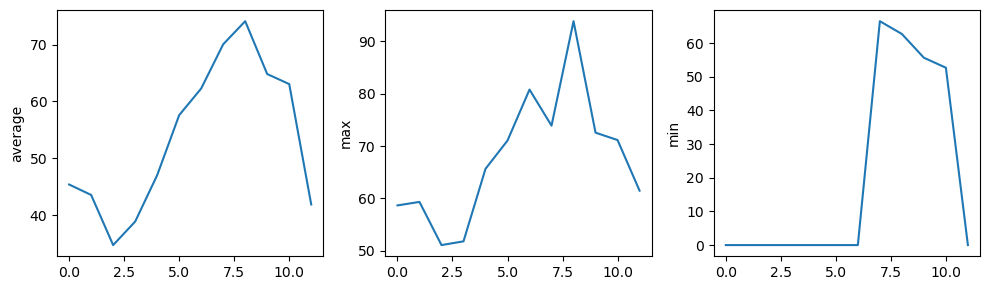

Hay ceros en el año  0 archivo datos/humedad_mensual_estacion01.csv
Hay ceros en el año  2 archivo datos/humedad_mensual_estacion01.csv
Hay ceros en el año  4 archivo datos/humedad_mensual_estacion01.csv
datos/indiceUV_mensual_estacion01.csv


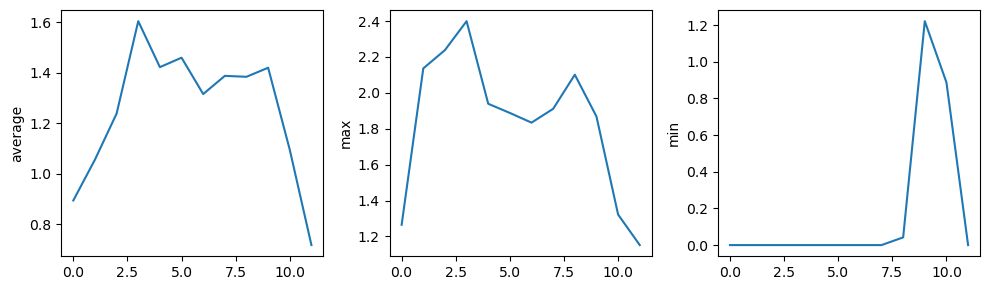

Hay ceros en el año  0 archivo datos/indiceUV_mensual_estacion01.csv
Hay ceros en el año  2 archivo datos/indiceUV_mensual_estacion01.csv
Hay ceros en el año  4 archivo datos/indiceUV_mensual_estacion01.csv
datos/precip_mensual_estacion01.csv


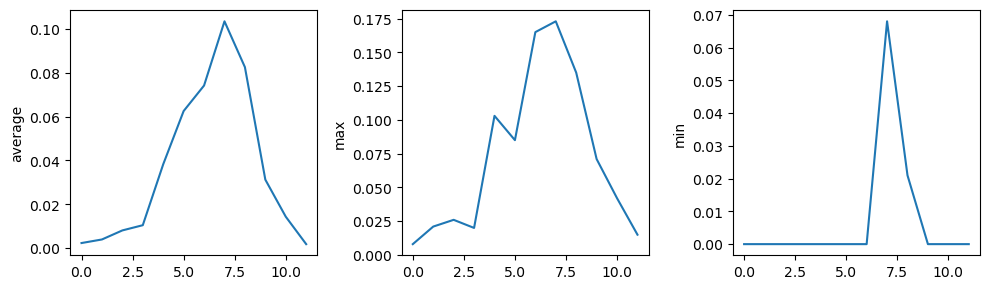

Hay ceros en el año  0 archivo datos/precip_mensual_estacion01.csv
Hay ceros en el año  1 archivo datos/precip_mensual_estacion01.csv
Hay ceros en el año  2 archivo datos/precip_mensual_estacion01.csv
Hay ceros en el año  4 archivo datos/precip_mensual_estacion01.csv
Hay ceros en el año  5 archivo datos/precip_mensual_estacion01.csv
Hay ceros en el año  6 archivo datos/precip_mensual_estacion01.csv
Hay ceros en el año  7 archivo datos/precip_mensual_estacion01.csv


In [45]:
archivos = sorted(glob.glob('datos/*_mensual_estacion01.csv'))

for archivo in archivos[:3]:
    print(archivo)
    visualiza(archivo)
    detecta_problemas(archivo)


 ### Definición de parámetros por omisión (default)
 
 Hasta ahora hemos pasado parámetros de dos formas: directamente como en `type(data)`, y por nombre, como en `numpy.loadtxt(fname=algo.csv', delimiter=',')`. De hecho, podemos pasar el nombre del archivo a `loadtxt` sin usar `fname=`:

In [46]:
numpy.loadtxt('datos/precip_mensual_estacion01.csv', delimiter=',')

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.173, 0.021,
        0.035, 0.014, 0.   ],
       [0.005, 0.021, 0.026, 0.001, 0.003, 0.079, 0.113, 0.084, 0.064,
        0.012, 0.007, 0.   ],
       [0.   , 0.001, 0.001, 0.014, 0.032, 0.069, 0.069, 0.115, 0.135,
        0.071, 0.033, 0.   ],
       [0.001, 0.006, 0.005, 0.015, 0.068, 0.085, 0.061, 0.078, 0.07 ,
        0.067, 0.006, 0.015],
       [0.   , 0.003, 0.   , 0.009, 0.103, 0.063, 0.03 , 0.068, 0.098,
        0.009, 0.001, 0.   ],
       [0.005, 0.   , 0.013, 0.009, 0.028, 0.06 , 0.092, 0.076, 0.081,
        0.01 , 0.042, 0.   ],
       [0.   , 0.   , 0.012, 0.016, 0.048, 0.085, 0.165, 0.126, 0.126,
        0.   , 0.   , 0.   ],
       [0.008, 0.001, 0.008, 0.02 , 0.024, 0.059, 0.063, 0.107, 0.065,
        0.046, 0.012, 0.   ]])

pero debemos decir `delimiter=`:

In [47]:
numpy.loadtxt('datos/precip_mensual_estacion01.csv', ',')

SyntaxError: invalid syntax (<unknown>, line 1)

Para enteder qué está pasando veamos la ayuda de la función `loadtxt`:

In [48]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=None, max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.

    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    c

Hay mucha información pero en las dos primeras lineas vemos: 

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)

Esto nos dice que `loadtxt`tiene un parámetro llamado `fname`que no tiene un valor default y ocho parámetros que sí tienen valor default. Esto lo sabemos porque el valor default está después del `=`. `fname` no tiene esto por lo tanto la función siempre espera que la llames pasándole este parámetro. Si no especificas los otros ocho, entonces éstos tomarán el valor default.

**DOCUMENTACIÓN**: Podemos agregar información de ayuda a la función de la siguente forma:

In [49]:
def fahr_a_kelvin(temp_f):
    '''Esta función convierte el valor temp_f de Fahrenheit a Kelvin'''
    temp_c = fahr_a_celsius(temp_f)
    temp_k = celsius_a_kelvin(temp_c)
    return temp_k

print('El punto de ebullición  del agua en Kelvin:', fahr_a_kelvin(212.0))


El punto de ebullición  del agua en Kelvin: 373.15


In [50]:
help(fahr_a_kelvin)

Help on function fahr_a_kelvin in module __main__:

fahr_a_kelvin(temp_f)
    Esta función convierte el valor temp_f de Fahrenheit a Kelvin



#### Pon en práctica lo que aprendiste

1. Dado el siguiente código:

In [51]:
def func(a, b=3, c=6):
    print('a: ', a, 'b: ', b, 'c:', c)

¿Cuál será el resultado de correr?

`func(-1, 2)`

2. Si la variable `s` es una cadena, entonces `s[0]` es el primer caracter de la cadena y `s[-1]` es el último. Escribe una función que se llame `extremos` que regrese una cadena constituida por el primer y úlimo elementos del input de la función. La llamada a tu función deberá verse como:

`print(extremos('helio'))`

Output:
 `hm`

### 8.3 En resumen

* Define un función usando `def nombre_de_función(parámetros)`
* El cuerpo de la función debe estar indentado.
* Llama a una función usando `nombre_de_función(valor)`
* Las variables definidas dentro de un a función solo pueden ser vistas y usadas dentro de esa función.
* Si una variable no está definida dentro de la función, Python buscará la definición dentro del código que se encuentra antes de la llamada a la función.
* Usa `help(algo)` para ver la ayuda de algo.
* Agrega texto para documentar tu función usando `''' texto '''`.
* Especifica valores por default para los parámetros usando `parámetro=valor default` en la lista de parámetros dentro de la definición de la función.
* Los parámetros se pueden pasar a una función basados en el nombre, la posición u omitiéndolos, en cuyo caso se usa el valor default.